# EE698V Assignment 2
- Use python3
- Submit your "rendered" ipynb only (zip, pdf or txt files will not be accepted), i.e., with outputs of codes (plots and printed values) visible below
- Do not change the return variables, as the evaluation is done by test cases based on the variables specified. Only add your code at "### WRITE YOUR CODE HERE"
- Use only numpy library, no other package allowed
- We have provided a function to test your code but please note that we will be using different test cases for evaluating your assignment.
- If you are using your mobile phone, you can use colab.research.google.com for coding

# Function Approximation with a Linear Model
$y_d=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### Generate data

In [36]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    y=np.sin(x)

    ### WRITE YOUR CODE HERE - 2 MARKS

    return y

In [37]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [38]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,2 pi)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    x=2*np.pi*np.random.random((N,))
    yd=fx(x)

    ### WRITE YOUR CODE HERE - 2 MARKS

    return x, yd

In [39]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    #print(x.shape)
    #print(yd.shape)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

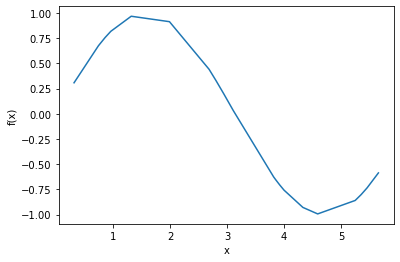

In [40]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [41]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    N=x.shape
    A=np.random.random((N[0], D+1))
    for i in range(N[0]):
        for j in range(D+1):
            A[i,j]=pow(x[i],j)
    ### WRITE YOUR CODE HERE - 5 MARKS

    return A

In [42]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the solutions you learnt in the video
- $w = (A^T A)^{-1} A^T y_d$, Least square solution, $N>D+1$
- $w =  A^T (A A^T)^{-1} y_d$, Min norm solution, $N\leq D+1$

In [43]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    dimensions=A.shape
    N=dimensions[0]
    D=dimensions[1]-1
    if N>D+1:
        w=np.dot(np.dot(np.linalg.inv(A.T.dot(A)),A.T),yd)
    else:
        w=np.dot(np.dot(A.T, np.linalg.inv(np.dot(A,A.T))),yd)

    ### WRITE YOUR CODE HERE - 10 MARKS

    return w

In [44]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [45]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    phi=createA(x,w.shape[0]-1)
    y=np.dot(phi,w)

    ### WRITE YOUR CODE HERE - 5 MARKS

    return y

In [46]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [47]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    mse=np.sum(np.square(y-yd))/y.shape[0]

    ### WRITE YOUR CODE HERE - 5 MARKS

    return mse

In [48]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [49]:
def plotModel(x, y, yd, title='',xlim=[0,7]):
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.xlim(xlim)
    plt.title(title)

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [50]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    x,yd=generateX_fx(N)
    A=createA(x,D)
    w=train_w(A,yd)
    y=predict_y(w,x)
    mse=compute_mse(y,yd)

    ### WRITE YOUR CODE HERE - 5 MARKS

    return x, y, yd, w, mse

In [58]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print('final weights are:', w)
    print('MSE on train data = ', mse)
#     plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

final weights are: [ 2.05335953 -0.89676708  0.07338083]
MSE on train data =  0.08477461505878252
Test passed 👍


## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [54]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    x,yd=generateX_fx(Ntest)
    y=predict_y(w,x)
    mse=compute_mse(y,yd)

    ### WRITE YOUR CODE HERE - 5 MARKS

    return x, y, yd, mse

[ 1.44969726e-02  1.00147228e+00 -5.43436920e-04 -1.68280387e-01
  2.16326530e-03  6.66887086e-03  7.95148778e-04 -4.32787901e-04
  4.04204122e-05 -4.94206151e-07 -5.70817819e-08]
MSE on train data =  0.0001315356565593165
MSE on test data =  0.00010961993375659777
Test passed 👍


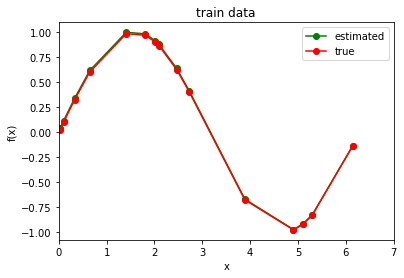

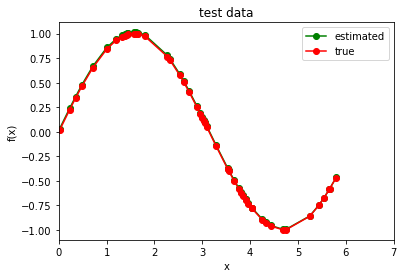

In [59]:
'''Testing'''
def test_testModel():
    D = 10
    # TRAINING
    N = 15
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd, title='train data')
    # TESTING
    Ntest = 50                  # no. of test points
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd, title='test data')
    print('Test passed', '\U0001F44D')
test_testModel()